<a href="https://colab.research.google.com/github/Angelo254/Moringa_Data_Science_Core_W4_Independent_Project_2021_09_Angelo_Sang_Python/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_2021_09_Angelo_Sang_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT 

In France,postal codes are used to identify the location of a place. First two digits represent the district, and the last three are for subdivisions (town or neighborhood). The dataset provided has 104 distinct postal codes. Considering Postal code 75015 and 75017, identify whether the rate at which Bluecars are picked from the two stations is the same

# HYPOTHESIS 

Is the number of Blue cars taken in postal code 75015 equal to the number of Blue cars taken in Postal Code 75017 ?

# METRIC FOR SUCCESS 

This project will be successful when we identify whether the Blue cars taken in postal code 75015 are the same as Blue Cars taken in Postal Code 75017

# LOADING THE DATA & LIBRARIES

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as pyplot

import seaborn as sns

import pandas_profiling

from sklearn.cluster import KMeans

from numpy.random import seed

from numpy.random import randn

from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading the data
df= pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
df.head(5)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
df.info()
#there are no null values in the dataframe
df.duplicated().sum()
#there are no duplicated values in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


0

In [4]:
#getting the correlation matrix of the dataframe
#the correlation of an element to itself is 1 thus the larger the value is as it approaches one means that the correlation is higher
#between the two variables/elements.
df.corr()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


# UNIVARIATE ANALYSIS

## Postal Code 
postal code of the area (in Paris)

In [5]:
df['Postal code'].value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: Postal code, Length: 104, dtype: int64

In [6]:
#column 1
df['Postal code'].unique()
# df.groupby(df['Postal code']).sum()
# df['Postal code'].value_counts()
#there are 104 unique postal codes 

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [7]:
df['Postal code'].isnull().sum()
#there are no null values in the postal code column

0

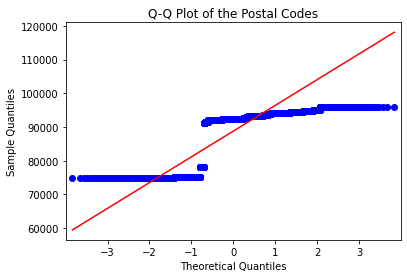

In [8]:
#Q-Q plot to show the distribution of the entries based on the postal codes.
qqplot(df['Postal code'], line='s')
pyplot.title('Q-Q Plot of the Postal Codes')
pyplot.show()

## Date
date of the row aggregation

In [9]:

df['date'].describe()
#the datatype for the date is wrong and should be changed to date_time
#there are 156 unique dates meaning that the data was taken over a period of 156 days

count        16085
unique         156
top       5/3/2018
freq           104
Name: date, dtype: object

In [10]:
#changing to date_time
from datetime import datetime
#first convert the date time into string 
df['date'] =  pd.to_datetime(df['date'])
df['date'].describe()
#the data records are from first January 2018 to 19th June 2018

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


count                   16085
unique                    156
top       2018-06-12 00:00:00
freq                      104
first     2018-01-01 00:00:00
last      2018-06-19 00:00:00
Name: date, dtype: object

## n_daily_data_points
number of daily data points that were available for aggregation, that day

In [11]:

df['n_daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [12]:
df['n_daily_data_points'].describe()

count    16085.000000
mean      1431.330619
std         33.212050
min       1174.000000
25%       1439.000000
50%       1440.000000
75%       1440.000000
max       1440.000000
Name: n_daily_data_points, dtype: float64

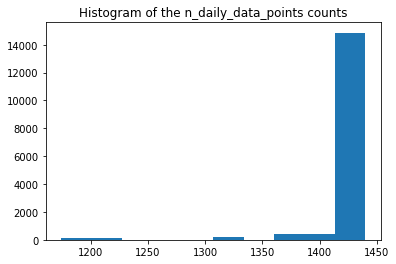

In [13]:
#Histogram of the n_daily_data_points column
pyplot.hist(df['n_daily_data_points'])
pyplot.title('Histogram of the n_daily_data_points counts')
pyplot.show()
#the data is skewed 
#the highest number of data points is 1440

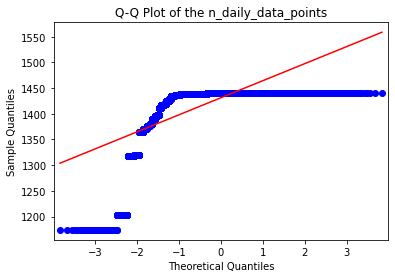

In [14]:
#Q-Q plot to show the distribution of the entries based on the n_daily_data_points.
qqplot(df['n_daily_data_points'], line='s')
pyplot.title('Q-Q Plot of the n_daily_data_points')
pyplot.show()
#The data does not follow a normal distribution

Text(0.5, 1.0, 'Box plot of n daily datapoints')

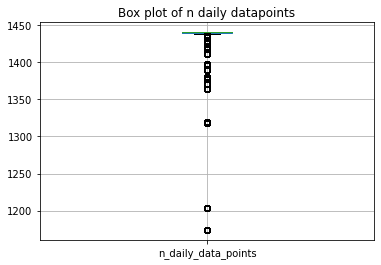

In [15]:
df.boxplot(column=['n_daily_data_points'])
pyplot.title('Box plot of n daily datapoints')

In [16]:
df['n_daily_data_points'].skew()
#the data is skewed to the left
#has a longer tail to the left of the distribution
#outliers lie on this part of the

-5.742776211517434

## Day Of Week
identifier of weekday (0: Monday -> 6: Sunday)

In [17]:
df['dayOfWeek'].unique()
#7 days of the week

array([0, 1, 2, 3, 4, 5, 6])

In [18]:
df['dayOfWeek'].describe()
#75% of the data was recorded on saturday

count    16085.000000
mean         2.969599
std          2.008378
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: dayOfWeek, dtype: float64

In [19]:
df.groupby(df['dayOfWeek']).count()
#the data distribution has a small variation with the values ranging from 2267 to 2374

,Postal code,date,n_daily_data_points,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
dayOfWeek,,,,,,,,,,,,
0,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374
1,2363,2363,2363,2363,2363,2363,2363,2363,2363,2363,2363,2363
2,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268
3,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268
4,2271,2271,2271,2271,2271,2271,2271,2271,2271,2271,2271,2271
5,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267
6,2274,2274,2274,2274,2274,2274,2274,2274,2274,2274,2274,2274


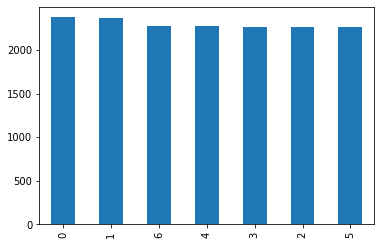

In [20]:
df['dayOfWeek'].value_counts().plot(kind='bar')
#plot of the data distribution for every day of the week.
#the Distribution has minimal variation.

## Day Type
Weekday or Weekend

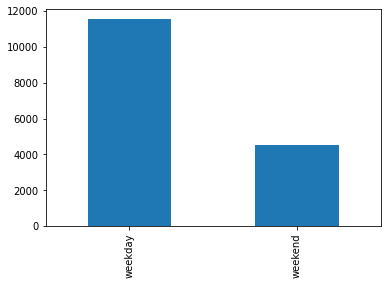

In [21]:
df['day_type'].value_counts().plot(kind='bar')
#plot of type of day of the week
#there are more entries during the weekdays than there are on weekends

## Blue Cars 

In [22]:
#Blue Cars taken sum
df['BlueCars_taken_sum'].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BlueCars_taken_sum, dtype: float64

(array([1.2077e+04, 1.4740e+03, 9.9900e+02, 7.6700e+02, 2.8800e+02,
        2.7600e+02, 1.2700e+02, 5.0000e+01, 1.9000e+01, 8.0000e+00]),
 array([   0. ,  135.2,  270.4,  405.6,  540.8,  676. ,  811.2,  946.4,
        1081.6, 1216.8, 1352. ]),
 <a list of 10 Patch objects>)

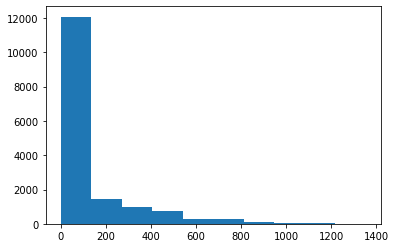

In [23]:
pyplot.hist(df['BlueCars_taken_sum'])
#The data is right skewed

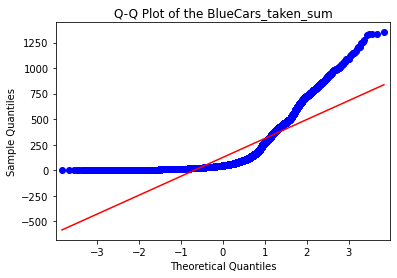

In [24]:
#Bluecars taken distribution on a Q-Q plot
qqplot(df['BlueCars_taken_sum'], line='s')
pyplot.title("Q-Q Plot of the BlueCars_taken_sum")
pyplot.show()
#Does not follow a normal distribution
#The qqplot confirms that the data is skewed

In [25]:
#Blue cars returned sum
df['BlueCars_returned_sum'].describe()

count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: BlueCars_returned_sum, dtype: float64

(array([1.2036e+04, 1.4850e+03, 9.7600e+02, 7.8700e+02, 3.0100e+02,
        2.7400e+02, 1.3400e+02, 6.2000e+01, 2.0000e+01, 1.0000e+01]),
 array([   0. ,  133.2,  266.4,  399.6,  532.8,  666. ,  799.2,  932.4,
        1065.6, 1198.8, 1332. ]),
 <a list of 10 Patch objects>)

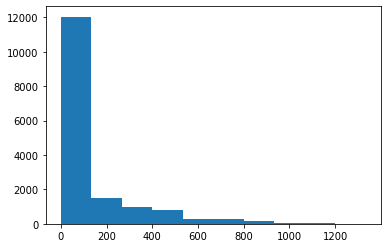

In [26]:
pyplot.hist(df['BlueCars_returned_sum'])

## Utilib

In [27]:
#Utilib taken sum column
df['Utilib_taken_sum'].describe()

count    16085.000000
mean         3.698290
std          5.815058
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         54.000000
Name: Utilib_taken_sum, dtype: float64

In [28]:
#Utilib returned sum column
df['Utilib_returned_sum'].describe()

count    16085.000000
mean         3.699099
std          5.824634
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         58.000000
Name: Utilib_returned_sum, dtype: float64

## Utilib 14

In [29]:
#Utilib 14 taken sum
df['Utilib_14_taken_sum'].describe()

count    16085.000000
mean         8.600560
std         12.870098
min          0.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        100.000000
Name: Utilib_14_taken_sum, dtype: float64

In [30]:
#Utilib 14 returned sum
df['BlueCars_returned_sum'].describe()

count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: BlueCars_returned_sum, dtype: float64

## Slots
the number of charging slots that were free in that area

In [31]:
#Slots_freed_sum column
df['Slots_freed_sum'].describe()

count    16085.000000
mean        22.629033
std         52.120263
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        360.000000
Name: Slots_freed_sum, dtype: float64

(array([1.3274e+04, 6.0800e+02, 6.4300e+02, 6.8100e+02, 4.0300e+02,
        2.6400e+02, 1.3200e+02, 5.5000e+01, 1.8000e+01, 7.0000e+00]),
 array([  0.,  36.,  72., 108., 144., 180., 216., 252., 288., 324., 360.]),
 <a list of 10 Patch objects>)

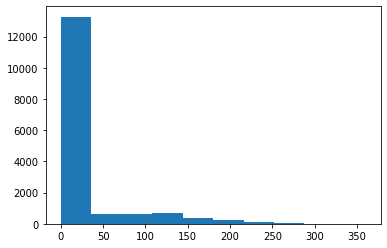

In [32]:
pyplot.hist(df['Slots_freed_sum'])
#were mostly zero meaning that most of the charging slots were not free

In [33]:
#Slots_taken_sum column
df['Slots_taken_sum'].describe()

count    16085.000000
mean        22.629282
std         52.146030
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        359.000000
Name: Slots_taken_sum, dtype: float64

(array([1.327e+04, 6.080e+02, 6.560e+02, 6.620e+02, 4.150e+02, 2.720e+02,
        1.240e+02, 5.100e+01, 1.900e+01, 8.000e+00]),
 array([  0. ,  35.9,  71.8, 107.7, 143.6, 179.5, 215.4, 251.3, 287.2,
        323.1, 359. ]),
 <a list of 10 Patch objects>)

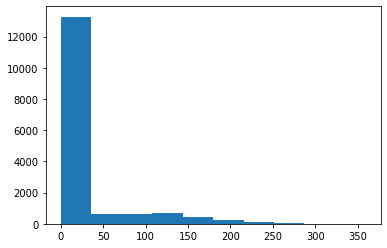

In [34]:
pyplot.hist(df['Slots_taken_sum'])
#were mostly zero meaning that most of the charging slots were not taken

# DATA CLEANING

### Validity

In [35]:
#The claim we are investigating is for the Blue cars only thus we drop utilib and utilib 14 columns
df_1 = df.drop(axis= 1, columns=['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum',])
df_1

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0
16081,95880,2018-06-16,1440,5,weekend,19,19,0,0
16082,95880,2018-06-17,1440,6,weekend,33,35,0,0
16083,95880,2018-06-18,1440,0,weekday,11,14,0,0


In [36]:
df_1.shape

(16085, 9)

### Accuracy

Text(0.5, 1.0, 'Boxplot of BlueCars_taken_sum')

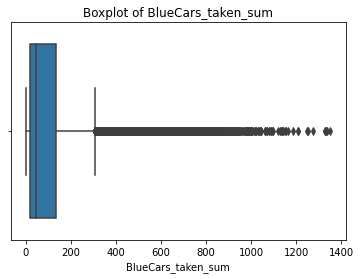

In [37]:
#Checking for outliers
sns.boxplot(x = df_1['BlueCars_taken_sum'])
pyplot.title('Boxplot of BlueCars_taken_sum')
#boxplot of the Blue cars taken
#There are outliers in the data since the data is right skewed

In [38]:
from scipy import stats
z = np.abs(stats.zscore(df_1['BlueCars_taken_sum']))
z

array([0.08589624, 0.15061389, 0.06511162, ..., 0.50116785, 0.61981688,
       0.66835512])

In [39]:
threshold = -3, 3
print(np.where(z > -3) or np.where(z < 3))

(array([    0,     1,     2, ..., 16082, 16083, 16084]),)


In [40]:
Q1 =  df_1['BlueCars_taken_sum'].quantile(0.25)
Q3 = df_1['BlueCars_taken_sum'].quantile(0.75)
IQR = Q3 - Q1
df_1[(df_1['BlueCars_taken_sum'] < Q1-1.5*IQR ) | (df_1['BlueCars_taken_sum'] > Q3+1.5*IQR)]['BlueCars_taken_sum'].count()
#there are 2215 outliers in the data based on the BlueCars_taken_sum column

2215

In [41]:
#Dropping the outliers
filter = (df_1['BlueCars_taken_sum'] >= Q1 - 1.5 * IQR) & (df_1['BlueCars_taken_sum'] <= Q3 + 1.5 *IQR)
df_2 = df_1.loc[filter]  
df_2
#2215 row entries have been dropped

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0
16081,95880,2018-06-16,1440,5,weekend,19,19,0,0
16082,95880,2018-06-17,1440,6,weekend,33,35,0,0
16083,95880,2018-06-18,1440,0,weekday,11,14,0,0


Text(0.5, 1.0, 'Boxplot of BlueCars_taken_sum after dropping outliers')

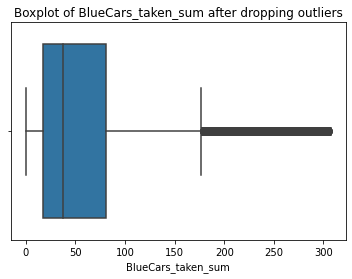

In [42]:
sns.boxplot(x = df_2['BlueCars_taken_sum'])
pyplot.title('Boxplot of BlueCars_taken_sum after dropping outliers')

In [43]:
Q1 = df_2.quantile(0.25)
Q3 = df_2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Postal code              1430.0
n_daily_data_points         1.0
dayOfWeek                   4.0
BlueCars_taken_sum         64.0
BlueCars_returned_sum      64.0
Slots_freed_sum             1.0
Slots_taken_sum             1.0
dtype: float64


### Completeness

In [44]:
df_2.isnull().sum()
#there are no null values

Postal code              0
date                     0
n_daily_data_points      0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
Slots_freed_sum          0
Slots_taken_sum          0
dtype: int64

### Consistency

In [45]:
df_2.duplicated().sum()
#There are no duplicated columns in thne dataframe

0

### Uniformity

In [46]:
df_2.columns = ["POSTAL CODE","DATE","N_DAILY_DATA_POINTS","DAY OF WEEK","DAY TYPE","BLUECARS_TAKEN_SUM","BLUECARS_RETURNED_SUM", "SLOTS_FREED_SUM","SLOTS_TAKEN_SUM"]
df_2
#changing the column names to Uppercase

,POSTAL CODE,DATE,N_DAILY_DATA_POINTS,DAY OF WEEK,DAY TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
0,75001,2018-01-01,1440,0,weekday,110,103,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0
16081,95880,2018-06-16,1440,5,weekend,19,19,0,0
16082,95880,2018-06-17,1440,6,weekend,33,35,0,0
16083,95880,2018-06-18,1440,0,weekday,11,14,0,0


#DATA UNDERSTANDING(BI-VARIATE ANALYSIS)

Text(0.5, 1.0, 'Blue Cars taken sum per day')

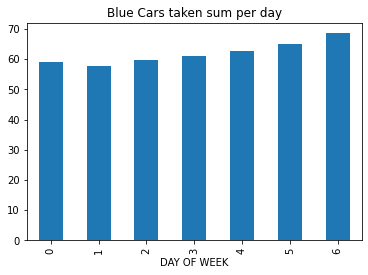

In [47]:
#Blue cars taken per day
df_3 = df_2
df_3
df_3.groupby('DAY OF WEEK')['BLUECARS_TAKEN_SUM'].mean().plot(kind='bar')
pyplot.title('Blue Cars taken sum per day')
#The highest number of Blue cars were taken on Sunday followed by Saturday

Text(0.5, 1.0, 'Blue Cars returned sum per day')

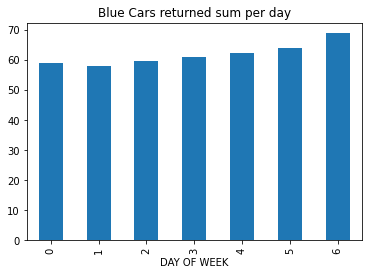

In [48]:
#Blue cars returned per day
df_4 = df_3
df_4
df_4.groupby('DAY OF WEEK')['BLUECARS_RETURNED_SUM'].mean().plot(kind='bar')
pyplot.title('Blue Cars returned sum per day')
#The highest number of Blue cars were returned on Sunday followed by Saturday

In [49]:
#Correlation between Blue cars taken and Blue Cars returned
df_5 = df_4
df_5
df_5['BLUECARS_TAKEN_SUM'].corr(df_5['BLUECARS_RETURNED_SUM'])
#There is very high correlation between the rate at which the  Blue cars are taken and returned

0.9956048599273822

In [50]:
df_5['BLUECARS_TAKEN_SUM'].corr(df_5['DAY OF WEEK'])
#There is very little correlation between How the Blue cars were taken and the day of the week

0.04911451257639324

Text(0.5, 1.0, 'Blue Cars taken sum per type of day')

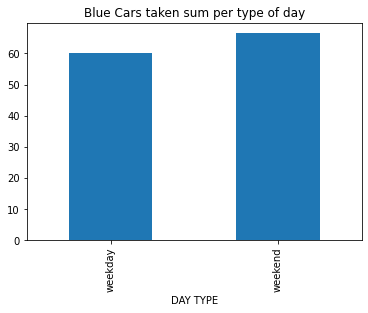

In [51]:
#Blue cars taken Weekday vs Weekend
df_5.groupby('DAY TYPE')['BLUECARS_RETURNED_SUM'].mean().plot(kind='bar')
pyplot.title('Blue Cars taken sum per type of day')
#Bar plot summary of how the Blue cars were picked up on weekdays vs weekends

In [52]:
#Mean of the Bluecars taken per month
df_5['DATE'] = pd.to_datetime(df_5['DATE'])
df_5.index = df_5['DATE']
df_5.resample('M').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,POSTAL CODE,N_DAILY_DATA_POINTS,DAY OF WEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
DATE,,,,,,,
2018-01-31,90853.319490,1433.916576,2.766120,61.265574,61.313297,4.331148,4.328962
2018-02-28,90686.838782,1435.680699,3.053739,59.993283,60.000000,4.674429,4.678012
2018-03-31,90808.372399,1436.163198,3.055495,61.756846,61.797006,4.964221,4.960935
2018-04-30,90762.917040,1421.677504,2.974589,62.790732,62.649851,4.914798,4.919656
2018-05-31,90872.616890,1422.953020,2.733221,62.808725,62.861298,4.668345,4.663870
2018-06-30,90816.021906,1435.783896,3.014210,62.770870,62.773239,4.178212,4.172291


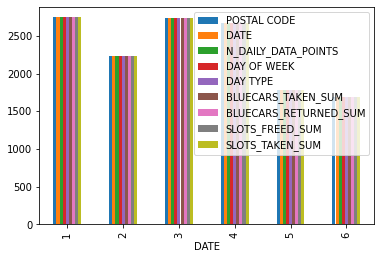

In [53]:
#Mmean number of (Bluecar taken) entries per month
df_5.groupby([df_5["DATE"].dt.month]).count().plot(kind="bar")

# HYPOTHESIS

## Null Hypothesis

The average number of Blue cars taken from Postal code 75015 Paris over weekend is same as those taken in Postal Code 75015

Ho :  μ of 75015 = μ of 75017

## Alternate Hypothesis

The average number of Blue cars taken from Postal code 75015 Paris over weekend is not the same as those taken in Postal Code 75015

Ha :  μ of 75015 ≠ μ of 75017

In [54]:
df_6 = df_2[df_2['POSTAL CODE'] == 75015]
df_6

,POSTAL CODE,DATE,N_DAILY_DATA_POINTS,DAY OF WEEK,DAY TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
DATE,,,,,,,,,
2018-02-24,75015,2018-02-24,1396,5,weekend,58,93,22,24
2018-06-19,75015,2018-06-19,1370,1,weekday,49,52,7,8


In [55]:
df_6.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


POSTAL CODE              75015.0
N_DAILY_DATA_POINTS       1383.0
DAY OF WEEK                  3.0
BLUECARS_TAKEN_SUM          53.5
BLUECARS_RETURNED_SUM       72.5
SLOTS_FREED_SUM             14.5
SLOTS_TAKEN_SUM             16.0
dtype: float64

In [58]:
df_7 = df_2.loc[df_5['POSTAL CODE'] == 75017]
df_7 

,POSTAL CODE,DATE,N_DAILY_DATA_POINTS,DAY OF WEEK,DAY TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
DATE,,,,,,,,,
2018-02-24,75017,2018-02-24,1396,5,weekend,51,57,12,10
2018-06-19,75017,2018-06-19,1370,1,weekday,38,41,5,5


In [57]:
df_7.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


POSTAL CODE              75017.0
N_DAILY_DATA_POINTS       1383.0
DAY OF WEEK                  3.0
BLUECARS_TAKEN_SUM          44.5
BLUECARS_RETURNED_SUM       49.0
SLOTS_FREED_SUM              8.5
SLOTS_TAKEN_SUM              7.5
dtype: float64

### Significance level

The significance level was set to 5% ,
Alpha = 0.05

## T-TEST

T test was adopted as the records count is less than 30.

In [60]:
#importing the ttest library
from scipy.stats import ttest_ind

In [61]:
#calculating the test statistic and P-value
ttest_ind(df_6['BLUECARS_TAKEN_SUM'], df_7['BLUECARS_TAKEN_SUM'])

Ttest_indResult(statistic=1.1384199576606167, pvalue=0.3729402871375441)

#Test Sensitivity

The null hypothesis failed to be rejected thus further tests should be carried out to explain the difference between the two postal codes. The method used relies on the mean for computation and may not be sufficient to give meaningful insight about the use of shared Electric cars in Paris.

## Conclusion

Since the p-value is larger than 0.05, we fail to reject the null hypothesis that significant similarity exists between the two Postal Codes.
